# Introduction

Il s'agit d'une introduction à l'analyse spectrale des signaux périodiques. Après avoir expliqué la décomposition d'un signal périodique en somme de fonctions sinusoïdales, on verra comment effectuer l'analyse spectrale d'un signal échantillonné.


# Série de Fourier et spectre d'un signal périodique

On considère un signal périodique, représenté par une fonction d'une variable t réelle à valeurs réelles, de période $T$ et de classe $\mathcal{C}^{1}$ par morceaux.

La fréquence fondamentale du signal est : $f_{1} = \dfrac{1}{T}$

D'après le théorème de Fourier, cette fonction peut s'écrire comme une somme de sinusoïdes dont les fréquences sont multiples de la fréquence fondamentale. La somme obtenue est la série de Fourier :

\begin{equation}
u(t) = \dfrac{A_{0}}{2} + \sum_{n=1}^{P}A_{n}.\cos\left(n.\dfrac{2\pi}{T}t+\varphi_{n}\right)
\end{equation}

Dans certains cas, la somme peut être stoppée à un rang P fini. Dans d'autres cas, il faut en principe considérer la limite .

Le terme de rang n est appelé l'harmonique de rang n du signal : c'est une sinusoïde de fréquence 
\begin{equation}
f_{n} = n.f_{1} = \dfrac{n}{T}
\end{equation}

L'harmonique de rang n est définie par son amplitude An (positive) et son déphasage $\varphi_{n}$.

Le terme constant $\dfrac{A_{0}}{2}$, qui peut être vu comme le terme de fréquence nulle, est la valeur moyenne du signal :

\begin{equation}
\dfrac{A_{0}}{2} = \dfrac{1}{T}\displaystyle\int_{0}^{T}u(t).dt
\end{equation}


Considérons comme exemple une fonction dont la série de Fourier s'arrête au rang P=3. On dit dans ce cas que le signal comporte trois harmoniques. Par convention, la période est prise égale à 1 :

In [1]:
import math

f1=1.0
def u(t):
    return 0.4+1.0*math.cos(2*math.pi*f1*t)\
            +0.5*math.cos(2*2*math.pi*f1*t-math.pi/3)\
            +0.2*math.cos(3*2*math.pi*f1*t+math.pi/4)

Pour tracer ce signal, il faut l'échantillonner, c'est-à-dire calculer les valeurs de u(t) pour des instants régulièrement répartis sur un intervalle et les placer dans un tableau. Voici un échantillonnage sur deux périodes comportant 500 points :

In [2]:
import numpy
N = 500
Tmax = 2.0
Te = Tmax/N
t = numpy.arange(0,N)*Te
x = numpy.zeros(N)
for k in range(N):
    x[k] = u(t[k])

La courbe du signal est obtenue avec la fonction plot, qui relie les points par des segments de droites. Si la période d'échantillonnage Te est petite par rapport à la période de la dernière harmonique (ici celle de rang 3), on obtient ainsi une bonne représentation graphique du signal.

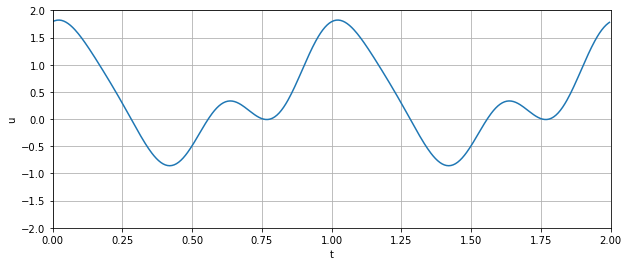

In [3]:
from matplotlib.pyplot import *
%matplotlib inline
figure(figsize=(10,4))
plot(t,x)
xlabel('t')
ylabel('u')
axis([0,2,-2,2])
grid()

Le spectre du signal est la représentation graphique de l'amplitude An en fonction de la fréquence. Un signal périodique a en théorie un spectre discret formé de raies, chacune correspondant à une harmonique. Pour cet exemple, il y a 4 raies : une pour la valeur moyenne (fréquence nulle) et 3 raies pour les harmoniques de rang 1, 2 et 3 :

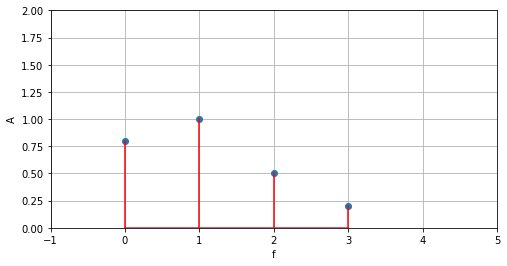

In [4]:
figure(figsize=(8,4))
stem([0,1,2,3],[0.8,1.0,0.5,0.2],'r')
xlabel('f')
ylabel('A')
axis([-1,5,0,2])
grid()

La première courbe (u en fonction de t) est la représentation temporelle du signal. Le spectre est la représentation fréquentielle du signal. En principe, il faudrait aussi tracer la phase ϕn pour avoir une représentation complète.

Pour les calculs, il est commode d'introduire la série de Fourier sous forme complexe :

\begin{equation}
    u(t) = \sum_{n=-P}^{P}C_{n}.e^{j.n\left(\dfrac{2\pi}{T}t\right)}
\end{equation}


Le coefficient $C_{n}$ est un nombre complexe appelé coefficient de Fourier. Il se calcule à partir de la fonction $u$ avec l'intégrale suivante :

\begin{equation}
    C_{n} = \dfrac{1}{T}\int_{0}^{T}u(t).e^{-j.n\dfrac{2\pi}{T}t}.dt \label{int06}
\end{equation}

Puisque $u(t)$ est réel, le coefficient de Fourier vérifie la propriété suivante : $\boxed{C_{n} = C^{*}_{-n}}$ avec $C^{*}$ le complexe conjugué de $C$ 

La somme s'écrit donc :
\begin{align}
    & u(t) = C_{0} + \sum_{n=1}^{P} \left[C_{n}.e^{j.n\left(\dfrac{2\pi}{T}t\right)} + C_{-n}.e^{-j.n\left(\dfrac{2\pi}{T}t\right)}\right]\notag\\
    & u(t) = C_{0} + 2 Re\left[\sum_{n=1}^{P} C_{n}.e^{j.n\left(\dfrac{2\pi}{T}t\right)}\right]
\end{align}

Par identification on en déduit :
\begin{equation}
    \begin{cases}
        C_{0} = \dfrac{A_{0}}{2}\\
        C_{n} = \dfrac{A_{n}}{2}e^{j\varphi_{n}}~,~n>0
   \end{cases}
\end{equation}

# Transformée de Fourier discrète 
## Définition
La transformée de Fourier discrète (TFD) est la transformation qui permet de calculer le spectre d'un signal discret, obtenu par échantillonnage d'un signal continu. Considérons un échantillonnage de la fonction u sur l'intervalle $[0;T]$, comportant $N$ points et défini par :
\begin{align}
    & t_{k} = k\dfrac{T}{N}~, k\in[\mid 0;N-1\mid]\\
    & u_{k} = u(t_{k}) 
\end{align}

On définit la période d'échantillonnage et la fréquence d'échantillonnage par :
\begin{align}
    & T_{e} = \dfrac{T}{N}\\
    & f_{e} = \dfrac{1}{T_{e}} 
\end{align}

Une valeur approchée de l'intégrale \ref{int06} définissant les coefficients de Fourier peut être obtenue par la méthode des rectangles : 
\begin{align}
    C_{n} \simeq \dfrac{1}{T}\sum_{k=0}^{N-1}\dfrac{T}{N}u_{k}e^{\left(-j\dfrac{2\pi.n.k}{N}\right)}
\end{align}

Par définition, la transformée de Fourier discrète (cf [1]) est l'application qui aux $N$ nombres $u_{k}$ associe les $N$ nombres complexes suivants :
\begin{align}
    \forall n\in[\mid 0;N-1 \mid], \widetilde{U}_{n} = \dfrac{1}{N}\sum_{k=0}^{N-1}u_{k}e^{\left(-j\dfrac{2\pi.n.k}{N}\right)}
\end{align}

La TFD ou DFT vérifie la propriété suivante (si $u_{k} \in \mathbf{R}$) : $\widetilde{U}_{n} = \widetilde{U}^{*}_{N-n}$

La transformée de Fourier discrète est calculée numériquement avec l'algorithme dit de Transformée de Fourier rapide. La fonction qui effectue ce calcul (sur un oscilloscope ou dans un logiciel) est souvent désignée par FFT (Fast Fourier Transform).

## Exemple : polynôme trigonométrique
Si $u$ est un polynôme trigonométrique, il existe un rang $P$ fini tel que l'on a : $C_{n} = 0$. Autrement dit, la série de Fourier s'arrête à un rang fini. Il existe donc dans le spectre du signal une fréquence maximale :
\begin{align}
    f_{max} = \dfrac{P}{T}
\end{align}

On suppose que la condition de Nyquist-Shannon est vérifiée : la fréquence d'échantillonnage est supérieure au double de la fréquence maximale du spectre.
\begin{align}
    f_{e} > 2f_{max}
\end{align}

ou encore : 
\begin{align}
    N > 2P
\end{align}

Si cette condition est vérifiée, alors les $P+1$ premières valeurs de la TFD sont exactement les coefficients de Fourier :
\begin{align}
    C_{n} = \widetilde{U}_{n} ~\text{pour}~0\leq n\leq P
\end{align}



Cette propriété est étonnante puisque la TFD est initialement définie pour donner des valeurs approchées des coefficients de Fourier. Sa démonstration est donnée plus loin (paragraphe 3.d).

Pour voir comment la TFD permet d'obtenir le spectre du signal, reprenons l'exemple précédent. Comme la période est égale à 1, l'indice $n$ correspond exactement à la fréquence. La plus grande fréquence du spectre est $P=3$ (harmonique de rang 3). Pour respecter la condition, il faut donc échantillonner à au moins 6 points par période. Voyons le résultat pour $N = 10$. La période du signal étant connue a priori, on peut échantillonner exactement 10 points sur une période :



Gasquet C., Witomski P.,  Analyse de Fourier et applications (Masson, 1995)

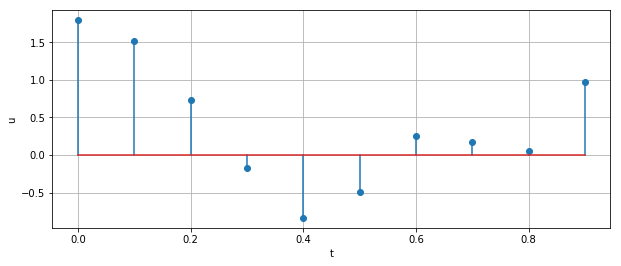

In [5]:
N = 10
Tmax = 1.0
Te = Tmax/N
t = numpy.arange(0,N)*Te
x = numpy.zeros(N)
for k in range(N):
    x[k] = u(t[k])
figure(figsize=(10,4))
stem(t,x)
xlabel('t')
ylabel('u')
grid()

Voici le calcul de la transformée de Fourier discrète :

In [6]:
import numpy.fft
tfd = numpy.fft.fft(x)
                 
print(tfd)

[  4.00000000e+00 +0.00000000e+00j   5.00000000e+00 -2.10942375e-15j
   1.25000000e+00 -2.16506351e+00j   7.07106781e-01 +7.07106781e-01j
   7.49400542e-16 +4.44089210e-16j   1.77635684e-15 +2.22044605e-15j
   7.49400542e-16 -4.44089210e-16j   7.07106781e-01 -7.07106781e-01j
   1.25000000e+00 +2.16506351e+00j   5.00000000e+00 -2.60902411e-15j]


On trace le module en fonction de la fréquence. On doit diviser par N car la fonction numpy.fft.fft calcule la TFD sans le facteur 1/N. Ici la fréquence est égale à l'indice n :

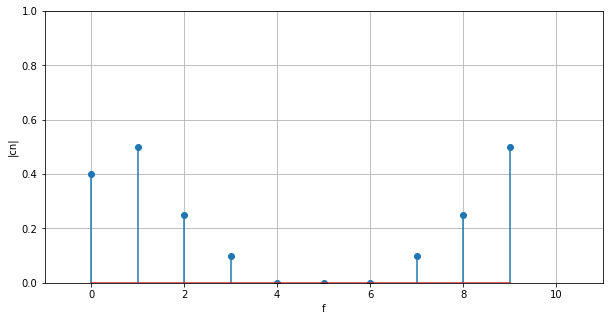

In [7]:
figure(figsize=(10,5))
f=numpy.arange(0,N,1)
stem(f,numpy.absolute(tfd)/N) 
xlabel("f")
ylabel("|cn|")
axis([-1,11,0,1])
grid()

Les 4 premières valeurs de la TFD donnent bien les coefficients de Fourier de rang 0 à 3. Les éléments d'indice 4,5 et 6 sont nulles, aux erreurs d'arrondis près (erreurs de l'ordre de 1e-16). Les trois trois dernièrs éléments (indices 7 à 9) sont les conjugués des trois coefficients $C_{1}$, $C_{2}$ et $C_{3}$; ils ont donc le même module. Le terme d'indice 1 est conjugué du terme d'indice 9, celui d'indice 2 conjugué du terme d'indice 8, etc. La fréquence centrale du spectre est égale à la moitié de la fréquence d'échantillonnage; c'est la fréquence de Nyquist. Ici, la fréquence de Nyquist est $f_{n}=5$. Comme la condition de Nyquist-Shannon est respectée, cette fréquence est supérieure à P=3. La partie du spectre située à gauche de cette fréquence est le spectre du signal continu $u(t)$. La totalité du spectre est celui du signal discret. La partie située à droite de la fréquence de Nyquist est l'image de la partie gauche (à l'exclusion de la composante de fréquence nulle). On voit que la condition de Nyquist-Shannon se traduit par le non chevauchement du spectre et de son image.

En fait, le spectre du signal discret est périodique, de période égale à la fréquence d'échantillonnage. La relation définissant la TFD vérifie en effet la relation :

\begin{align}
    \widetilde{U}_{N+n} = \widetilde{U}_{n}
\end{align}

La TFD que nous avons calculée donne donc les valeurs de ce spectre sur une période. Cependant, ce qui nous intéresse en pratique est plutôt le spectre du signal continu $u(t)$, qui est donné par la première moitié de la TFD. 

## Transformée de Fourier discrète inverse

L'information présente dans le signal échantillonné est entièrement contenue dans sa TFD. On peut en effet calculer le signal à partir de sa TFD par la relation suivante (voir [1] pour la démonstration) :

\begin{align}
    u_{k} = \sum_{n=0}^{N-1}e^{j\dfrac{2\pi.n.k}{N}}
\end{align}
La transformation qui permet ainsi de retrouver le signal discret est la transformation de Fourier discrète inverse. Elle ressemble beaucoup à la TFD directe : on remarque le changement de signe dans l'exponentielle et l'absence du facteur $1/N$. En ce qui concerne ce facteur, il existe d'ailleurs différentes conventions pour la définition de la TFD.

Comme exemple, calculons la TFD inverse de la TFD obtenue précédemment :

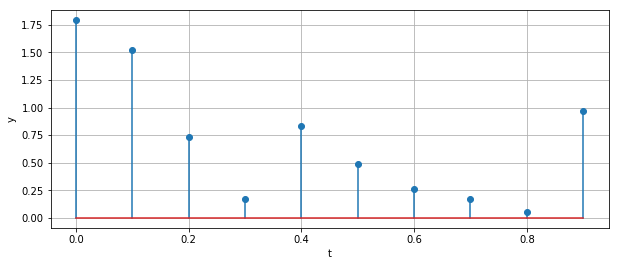

In [8]:
y = numpy.fft.ifft(tfd)
figure(figsize=(10,4))
stem(t,abs(y))
xlabel('t')
ylabel('y')
grid()

On retrouve bien le signal discret de départ.

Il est intéressant de modifier la TFD avant de calculer la TFD inverse. On peut par exemple enlever l'harmonique de rang 3. Pour cela, il faut annuler le coefficient d'indice 3 et son image, d'indice $N-3=7$ :

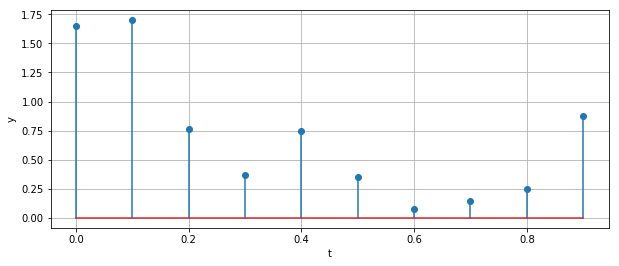

In [9]:
i=3
tfd[i] = 0
tfd[N-i] = 0
y = numpy.fft.ifft(tfd)
figure(figsize=(10,4))
stem(t,abs(y))
xlabel('t')
ylabel('y')
grid()

Le résultat est le signal discret qui serait obtenu par échantillonnage du signal $u(t)$ auquel on aurait enlevé l'harmonique de rang 3. On a donc là une méthode de filtrage très sélective, appelée filtrage dans le domaine fréquentiel, ou filtrage par transformée de Fourier. Elle peut être utilisée lorsqu'on doit filtrer un signal discret dont la taille N est fixée à l'avance (et pas trop grand). Cependant, cette méthode n'est pas utilisable pour faire un filtre temps-réel, pour lequel il y a un flux continu de données à traiter. Dans ce cas, on effectue un filtrage dans le domaine temporel, appelé aussi filtrage par convolution. Voir à ce sujet le document Introduction aux filtres numériques.


## Relation entre la TFD et les coefficients de Fourier

Ce paragraphe donne la démonstration de l'égalité entre les coefficients de Fourier et la TFD.

On considère la série de Fourier pour l'instant $t_{k}=\dfrac{kT}{N}$ : 
\begin{align}
    u_{k} = \sum_{m=-\infty}^{+\infty}C_{m}e^{j.m\dfrac{2\pi}{T}\dfrac{k.T}{N}} = \sum_{m=-\infty}^{+\infty} C_{m}e^{j\dfrac{2\pi.m.k}{N}}
\end{align}

On se place pour l'instant dans le cas théorique général, où la somme doit être étendue à l'infini. Considérons la division entière de l'indice m par N :
\begin{align}
    m = q.N+n
\end{align}

$q$ est l'entier résultat de cette division et n est le reste. La somme sur l'indice m peut s'écrire comme une double somme, sur $n$ et sur $q$. En regroupant tous les termes qui ont le même reste, on obtient ainsi :
\begin{align}
    u_{k} = \sum_{n=0}^{N-1}\left(\sum_{q=-\infty}^{+\infty}C_{qN+n}\right)e^{j\dfrac{2\pi.n.k}{N}}
\end{align}

En identifiant cette expression avec celle de la TFD inverse, on montre que :


\begin{align}
    \widetilde{U}_{n} =\sum_{q=-\infty}^{+\infty} C_{qN+n} 
\end{align}


On se place à présent dans le cas où il existe un rang $P$ tel que pour |k|>P on ait $C_{k}=0$. On suppose de plus que $N>2P$ (condition de Nyquist-Shannon).

Soit un entier $n$ tel que $0\leq n\leq P$ . Pour $q>0$, on a $q.N+n>2q.P+n>2P+n>P$ donc $C_{qN+n}=0$. De même pour $q<0$ on a $qN+n<2qP+n<-2P+n<-P$ donc $C_{qN+n}=0$. Tous les termes de la somme sont donc nuls :

\begin{align}
    \forall n\in[\mid 0;P \mid],~\widetilde{U}_{n} -C_{n} = 0 
\end{align}

Cela démontre l'égalité entre les $P+1$ premiers termes de la TFD et les coefficients de Fourier, pourvu que la condition de Nyquist-Shannon soit respectée.







# Analyse spectrale des signaux réels
## Fenêtre d'analyse
Un signal périodique réel a une période qui, le plus souvent, n'est pas connue a priori. L'objectif de l'analyse spectrale est justement de déterminer les fréquences qu'il contient. Par ailleurs, sa périodicité peut être imparfaite, voire très grossière. On voit donc que l'approche précédente, qui consistait à échantillonner le signal sur sa période T, n'est pas applicable en pratique.

Au lieu de cherche à échantillonner sur une période, on considère une durée T grande devant la période supposée. Par exemple, pour un son de fréquence $400~Hz$, on peut prendre $T$ d'environ 1 seconde. On obtient ainsi un spectre dont les raies sont les coefficients de Fourier d'une fonction de période T. Les fréquences de ces raies sont donc multiples de 1/T. La durée T est la largeur de la fenêtre d'analyse. La résolution fréquentielle du spectre obtenu est 1/T.

## Exemple : fonction échantillonnée
On reprend le signal déjà utilisé en modifiant sa fréquence :

In [10]:
f1 = 1.0324

On choisit une durée d'analyse T=20, qui donnera une résolution fréquentielle de 0.05. La fréquence d'échantillonnage doit respecter la condition de Nyquist-Shannon, c'est-à-dire fe>7.



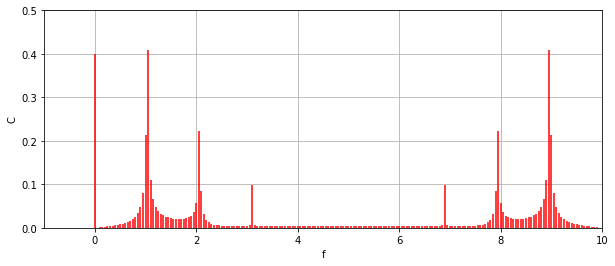

In [11]:
T=20.0
fe=10.0
N=int(T*fe)
t = numpy.arange(0,N)*Te
x = numpy.zeros(N)
for k in range(N):
    x[k] = u(t[k])
tfd=numpy.fft.fft(x)
f=numpy.arange(0,N)*1.0/T
figure(figsize=(10,4))
vlines(f,[0],numpy.absolute(tfd)/N,'r')
xlabel('f')
ylabel('C')
axis([-1,10,0,0.5])
grid()

Le spectre obtenu est composé de raies très resserées, espacées de $1/T$. Le spectre de la fonction apparaît comme la courbe dessinée par ces raies. La démonstration de cette propriété sort du cadre de cette introduction, car elle fait appel à la notion de transformée de Fourier.

On voit sur cet exemple que le spectre obtenu est imparfait : la position du maximum des raies est définie au mieux avec une précision de $1/T$. Dans le cas présent, cela induit une erreur bien visible sur la hauteur des raies. Pour améliorer la précision, il faut augmenter la durée de la fenêtre d'analyse. Voyons le résultat avec $T = 10000$ :

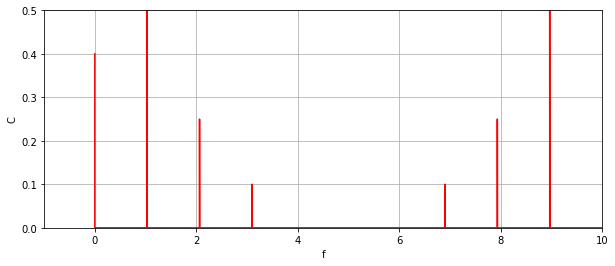

In [12]:
T=10000.0 
fe=10.0
N=int(T*fe)
t = numpy.arange(0,N)*Te
x = numpy.zeros(N)
for k in range(N):
    x[k] = u(t[k])
tfd=numpy.fft.fft(x)
f=numpy.arange(0,N)*1.0/T
figure(figsize=(10,4))
plot(f,numpy.absolute(tfd)/N,'r')
xlabel('f')
ylabel('C')
axis([-1,10,0,0.5])
grid()

La résolution fréquentielle est bien meilleure. Les amplitudes des harmoniques attendues (d'après la définition du signal) sont correctes : $C_{0}= 0.4$, $C_{1} = 0.5$, $C_{2} = 0.25$, $C_{3} = 0.1$. 

Remarque : on a ici utilisé la fontion plot et non vlines car cette dernière n'est pas optimisée pour le traitement d'un gros volume de données.

## Exemple : analyse d'un son
Voyons à présent un exemple plus réaliste, l'analyse du son émis par un instrument de musique. Il s'agit du son émis par une clarinette (note La3) pendant une durée d'environ 3 secondes. Evidemment, la largeur de la fenêtre d'analyse est limitée par cette durée.

Le son est enregistré dans un fichier WAV. On commence par lire le fichier et on extrait la fréquence d'échantillonnage, le nombre d'échantillons et la durée du son :

In [13]:
import scipy.io.wavfile as wave
fe,data = wave.read("clarinette_la3.wav")
N = data.size
T = N*1.0/fe
print(fe)
print(T)

44100
2.8908843537414968


Pour obtenir une représentation temporelle du signal (la forme d'onde), il faut se limiter à une fenêtre comportant une dizaine d'oscillations, soit ici environ 0.02 s :

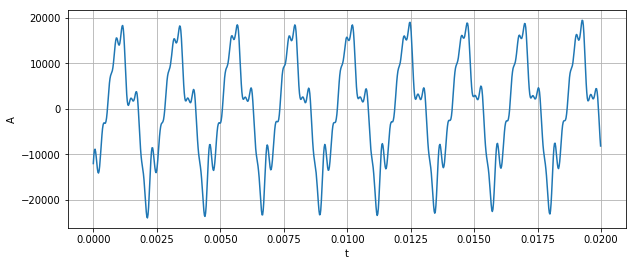

In [14]:
te = 1.0/fe
T = 0.02
N = int(T/te)
t = numpy.arange(N)*te
x = data[0:N]
figure(figsize=(10,4))
plot(t,x)
xlabel("t")
ylabel("A")
grid()

La forme d'onde laisse deviner un spectre très riche en harmoniques.

Pour faire l'analyse spectrale, on choisit une fenêtre de largeur $T=1~Hz$, qui donnera une précision de 1 Hz sur la fréquence :



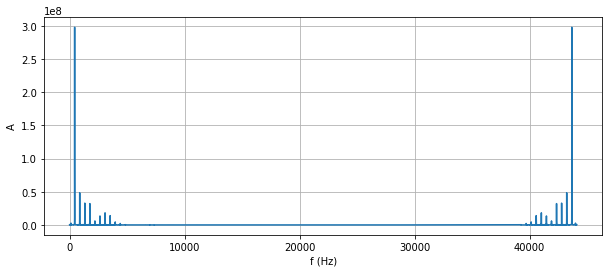

In [20]:
T=1.0
N=int(T/te)
x = data[0:N]
tfd = numpy.fft.fft(x)
f = numpy.arange(N)*1.0/T
a = numpy.absolute(tfd)
figure(figsize=(10,4))
plot(f,a)
xlabel("f (Hz)")
ylabel("A")
grid()

On s'intéresse au spectre du son en tant que signal continu, c'est-à-dire à la première moitié. Voyons le détail dans la bande [0,5 kHz] :

[0, 5000, 0, 298123879.30909348]

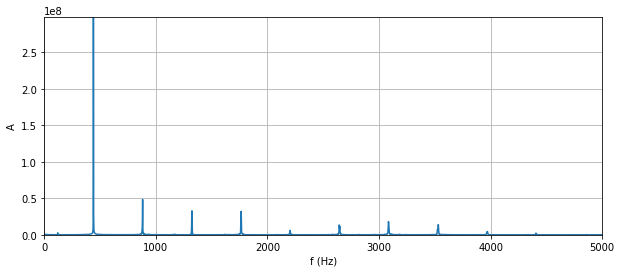

In [21]:
figure(figsize=(10,4))
plot(f,a)
xlabel("f (Hz)")
ylabel("A")
grid()
axis([0,5000,0,a.max()])

On repère sur ce spectre le fondamental (à 440 Hz) et des harmoniques de rang 2 à 8. Les harmoniques de rang élevé (par exemple 7) ont une fréquence très élevée (pour l'oreille). Bien que leur amplitude soit relativement faible, elles contribuent au timbre du son.